In [1]:
import pandas as pd
from scipy.stats import kstest, norm

ks_results_packages= {}
ks_results_pallets= {}
ks_results_percentage_contribution= {}
ks_results_arrival_time= {}

# Load the data into a DataFrame
df = pd.read_csv('data.csv')

# Define a function to perform the Kolmogorov-Smirnov test for normality
def ks_test(data):
    # Perform the KS test
    statistic, p_value = kstest(data, 'norm', args=(data.mean(), data.std()))
    return (statistic, p_value)

for truck in df['Truck Number'].unique():
    truck_df = df[df['Truck Number'] == truck].reset_index(drop=True)
    # Analyze the number of packages on the trucks
    packages = ks_test(truck_df['actual_packages'])

    # Analyze the number of pallets on the trucks
    pallets = ks_test(truck_df['actual_pallets'])

    # Analyze the percentage of the total number of packages on the truck
    percentage = ks_test(truck_df['percentage contribution'])

    # Analyze the arrival time of the truck
    arrival_time = ks_test(truck_df['arrival_minutes'])

    # Store the results in a dictionary
    ks_results_packages[truck] = packages
    ks_results_pallets[truck] = pallets
    ks_results_percentage_contribution[truck] = percentage
    ks_results_arrival_time[truck] = arrival_time

#GENERATE a table with all of the results with the truck number as index and the statistic and p-value as columns
print("Kolmogorov-Smirnov Test Results:")
print("Number of Packages:")
print(pd.DataFrame(ks_results_packages, index=['Statistic', 'P-value']).T)
print("Number of Pallets:")
print(pd.DataFrame(ks_results_pallets, index=['Statistic', 'P-value']).T)
print("Percentage of Total Packages:")
print(pd.DataFrame(ks_results_percentage_contribution, index=['Statistic', 'P-value']).T)
print("Arrival Time:")
print(pd.DataFrame(ks_results_arrival_time, index=['Statistic', 'P-value']).T)


Kolmogorov-Smirnov Test Results:
Number of Packages:
    Statistic   P-value
1    0.088045  0.391324
2    0.080581  0.472455
3    0.104103  0.199799
4    0.181974  0.001740
5    0.058445  0.852712
6    0.122568  0.093785
7    0.230759  0.000026
8    0.089740  0.374116
9    0.103942  0.145475
10   0.052476  0.963710
11   0.233342  0.000016
12   0.075709  0.582334
13   0.098460  0.258646
14   0.105553  0.204963
15   0.093671  0.384818
Number of Pallets:
    Statistic       P-value
1    0.098104  2.674887e-01
2    0.130465  4.934825e-02
3    0.179554  2.236605e-03
4    0.261521  9.158334e-07
5    0.099706  2.409525e-01
6    0.137432  4.302323e-02
7    0.278609  1.460927e-07
8    0.142889  3.033000e-02
9    0.109082  1.118939e-01
10   0.131333  9.722676e-02
11   0.251792  2.360288e-06
12   0.205125  3.331752e-04
13   0.147908  2.063036e-02
14   0.128091  7.094288e-02
15   0.193469  1.999624e-03
Percentage of Total Packages:
    Statistic   P-value
1    0.047602  0.967842
2    0.067913  0.6

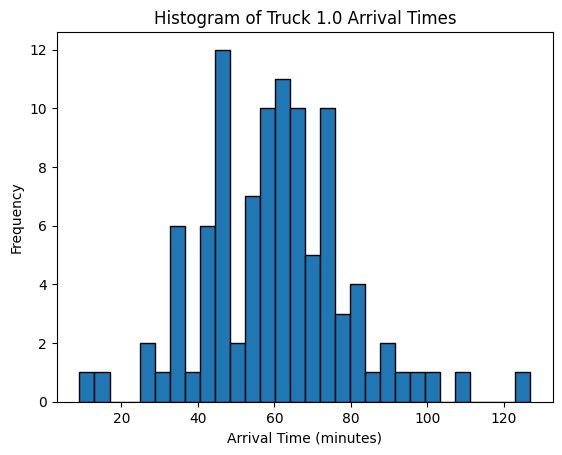

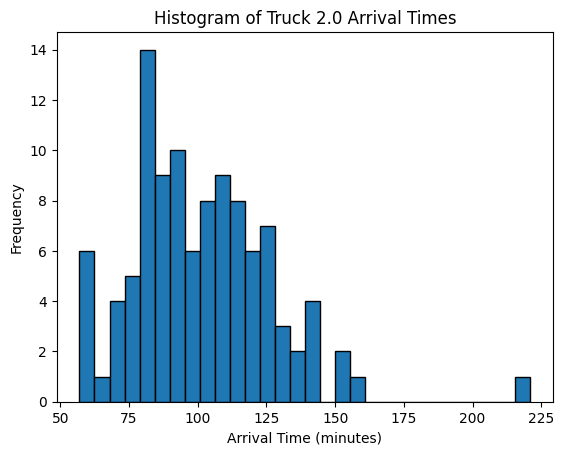

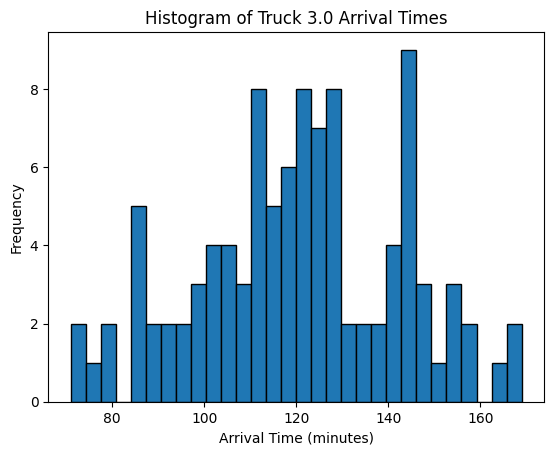

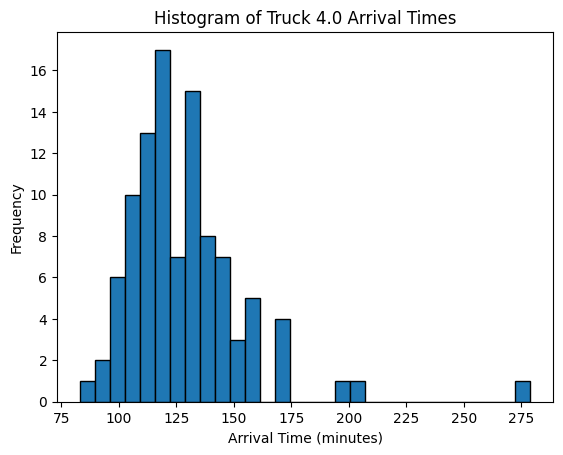

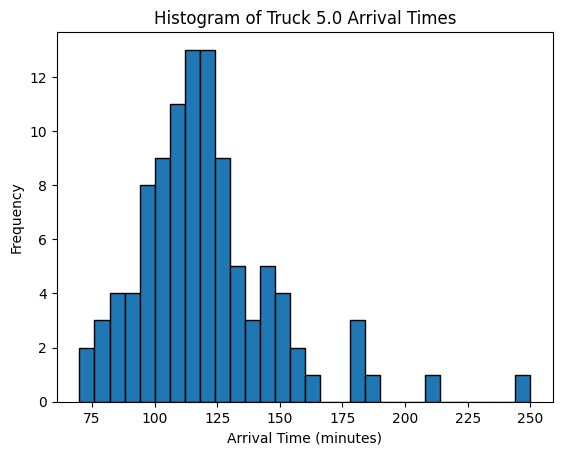

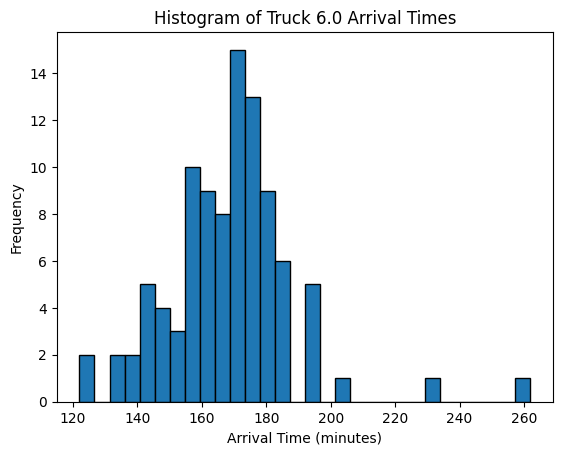

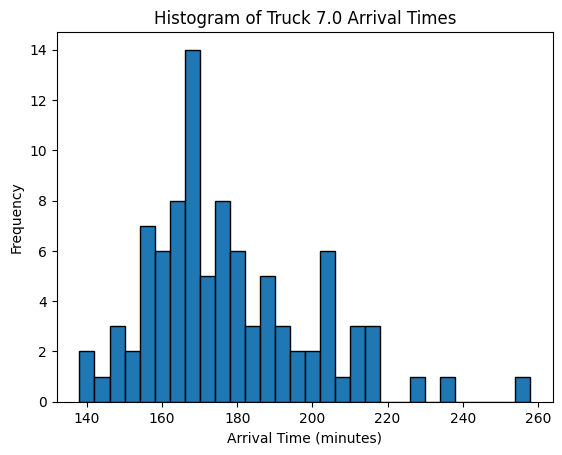

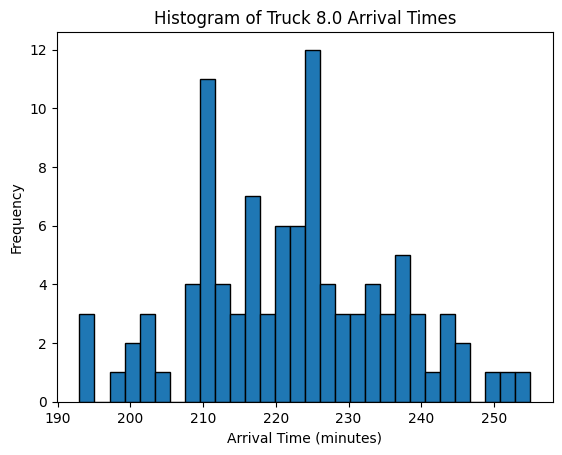

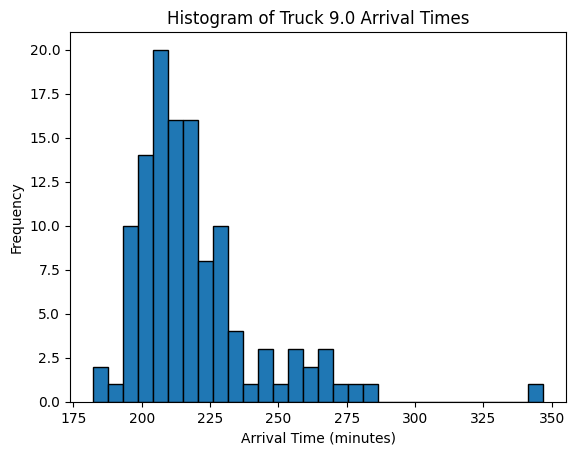

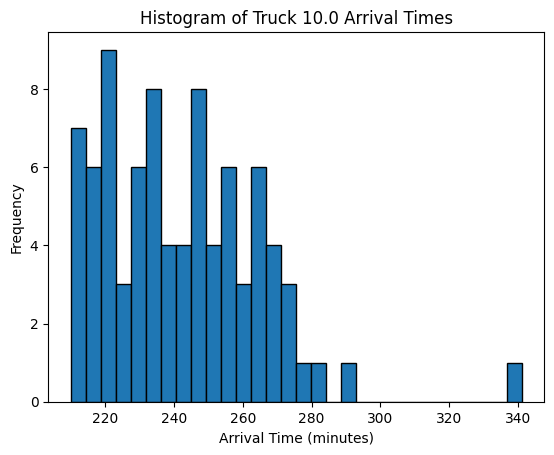

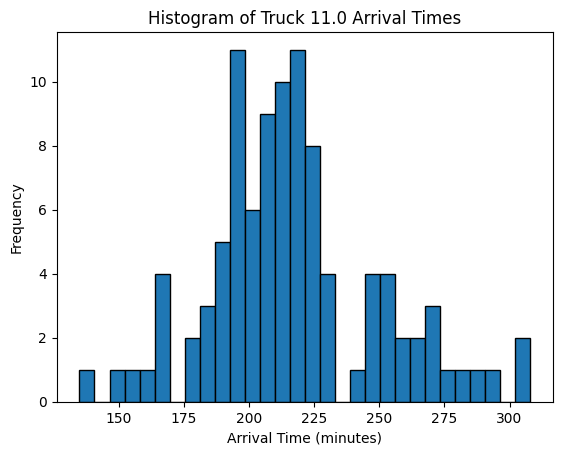

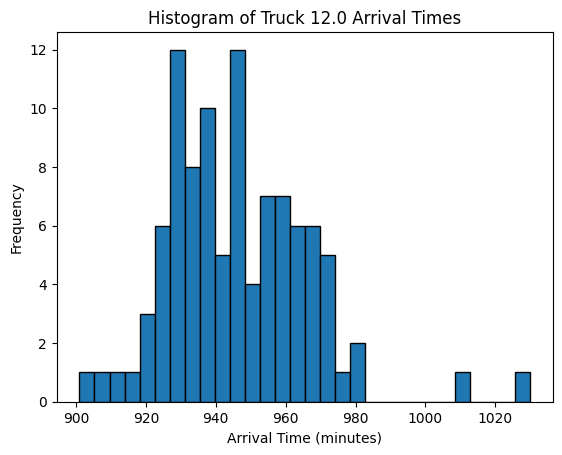

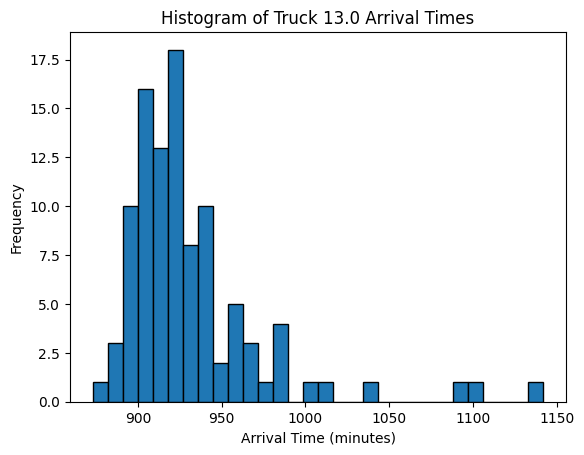

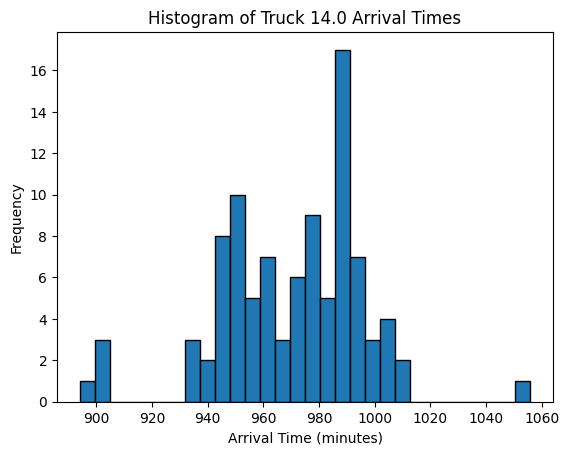

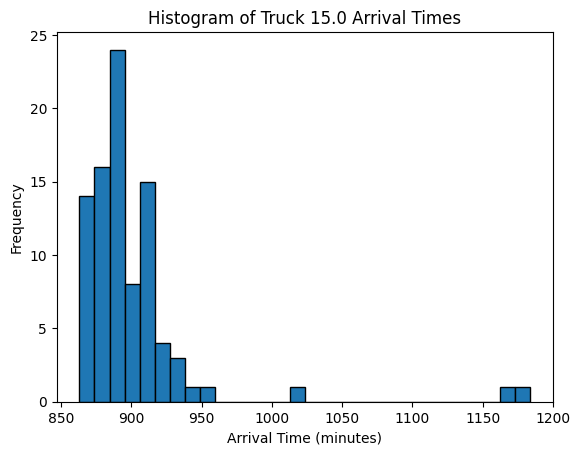

Arrival Time:
      Statistic   P-value
1.0    0.072579  0.641119
2.0    0.072109  0.613828
3.0    0.055281  0.893898
4.0    0.120096  0.099890
5.0    0.133261  0.048543
6.0    0.110376  0.178826
7.0    0.120713  0.122403
8.0    0.060059  0.842057
9.0    0.176801  0.001069
10.0   0.076341  0.676067
11.0   0.133977  0.051981
12.0   0.077177  0.564134
13.0   0.200928  0.000514
14.0   0.086990  0.437170
15.0   0.260092  0.000008


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

ks_results_arrival_time_2 = {}
# Load the data into a DataFrame
data = pd.read_csv('linehaul_all_predict - Copy2.csv')

filtered_df = data[data['sortation_center_id'] == 3858]

# Define the start time
start_time = '16:30'


# Convert 'planned_arrival_datetime' and 'actual_arrival_datetime' to datetime
#filtered_df['planned_arrival_datetime'] = pd.to_datetime(filtered_df['planned_arrival_datetime'])
filtered_df.loc[:, 'planned_arrival_datetime'] = pd.to_datetime(filtered_df['planned_arrival_datetime'])
#filtered_df['actual_arrival_datetime'] = pd.to_datetime(filtered_df['actual_arrival_datetime'])
filtered_df.loc[:, 'actual_arrival_datetime'] = pd.to_datetime(filtered_df['actual_arrival_datetime'])
planned_truck = {}
time_diff = (filtered_df['actual_arrival_datetime'] - filtered_df['planned_arrival_datetime']).abs()
filtered_df = filtered_df[time_diff <= pd.Timedelta(hours=3)]

for truck in filtered_df['Truck Number'].unique():
    truck_df = filtered_df[filtered_df['Truck Number'] == truck].reset_index(drop=True)
    
    # Convert 'actual_arrival_datetime' to datetime
    truck_df['arrival_time'] = pd.to_datetime(truck_df['actual_arrival_datetime'])
    planned_truck[truck] = truck_df['planned_arrival_datetime']
    # Iterate over each row in the truck DataFrame
    for idx, row in truck_df.iterrows():
        arrival_time = row['arrival_time']
        if arrival_time.time() < datetime.strptime('15:00:00', '%H:%M:%S').time():
            arrival_time += pd.Timedelta(days=1)
        
        shift_time = pd.to_datetime(f"{row['inbound_date']} {start_time}")
        truck_df.at[idx, 'shift_time'] = shift_time
        truck_df.at[idx, 'arrival_time'] = arrival_time

    truck_df['arrival_mins'] = (truck_df['arrival_time'] - truck_df['shift_time']).dt.total_seconds() // 60
    arrival_time_ks_2 = ks_test(truck_df['arrival_mins'])
    ks_results_arrival_time_2[truck] = arrival_time_ks_2
    
    plt.hist(truck_df['arrival_mins'], bins=30, edgecolor='black')
    plt.title(f'Histogram of Truck {truck} Arrival Times')
    plt.xlabel('Arrival Time (minutes)')
    plt.ylabel('Frequency')
    plt.show()

print("Arrival Time:")
print(pd.DataFrame(ks_results_arrival_time_2, index=['Statistic', 'P-value']).T)

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
import math
from scipy.stats import chisquare

csv_file ='linehaul_all_predict - Copy.csv'
sortation_center_id = 3858
predicted_volume = 9000
prediction_date = '2024-09-01'

data = pd.read_csv(csv_file)
linehaul_schedule = pd.read_csv('linehaul_schedule.csv')
mean_dict_actual_pack = {}
std_dict_actual_pack = {}
mean_dict_actual_pal = {}
std_dict_actual_pal = {}
mean_dict_per= {}
std_dict_per = {}
mean_dict_arrive = {}
std_dict_arrive = {}

filtered_df = data[data['sortation_center_id'] == sortation_center_id]

for truck in filtered_df['Truck Number'].unique():
    truck_filtered_df = data[data['Truck Number'] == truck]
    mean_pack = truck_filtered_df['actual_packages'].mean()
    mean_pal = truck_filtered_df['actual_pallets'].mean()
    mean_per = truck_filtered_df['percentage contribution'].mean()
    std_pack = truck_filtered_df['actual_packages'].std()
    std_pal = truck_filtered_df['actual_pallets'].std()
    std_per = truck_filtered_df['percentage contribution'].std()
    mean_dict_actual_pack[truck] = mean_pack
    std_dict_actual_pack[truck] = std_pack
    mean_dict_actual_pal[truck] = mean_pal
    std_dict_actual_pal[truck] = std_pal
    mean_dict_per[truck] = mean_per
    std_dict_per[truck] = std_per

mean_dict_actual_pack = pd.DataFrame(mean_dict_actual_pack.items(), columns=['Truck Number', 'Mean Packages'])
std_dict_actual_pack = pd.DataFrame(std_dict_actual_pack.items(), columns=['Truck Number', 'Standard Deviation Packages'])
mean_dict_per = pd.DataFrame(mean_dict_per.items(), columns=['Truck Number', 'Mean Percentage'])
std_dict_per = pd.DataFrame(std_dict_per.items(), columns=['Truck Number', 'Standard Deviation Percentage'])
mean_dict_actual_pal = pd.DataFrame(mean_dict_actual_pal.items(), columns=['Truck Number', 'Mean Pallets'])
std_dict_actual_pal = pd.DataFrame(std_dict_actual_pal.items(), columns=['Truck Number', 'Standard Deviation Pallets'])
mean_std_actual = pd.merge(mean_dict_actual_pack, std_dict_actual_pack, on='Truck Number')
mean_std_per = pd.merge(mean_dict_per, std_dict_per, on='Truck Number')
mean_std_actual_pal = pd.merge(mean_dict_actual_pal, std_dict_actual_pal, on='Truck Number')
mean_std_stuff = pd.merge(mean_std_actual, mean_std_actual_pal, on='Truck Number')
mean_std_all = pd.merge(mean_std_stuff, mean_std_per, on='Truck Number')

start_time = '16:30'
time = '16:30'
filtered_df.loc[:, 'planned_arrival_datetime'] = pd.to_datetime(filtered_df['planned_arrival_datetime'])
filtered_df.loc[:, 'actual_arrival_datetime'] = pd.to_datetime(filtered_df['actual_arrival_datetime'])
planned_truck = {}

time_diff = (filtered_df['actual_arrival_datetime'] - filtered_df['planned_arrival_datetime']).abs()
filtered_df = filtered_df[time_diff <= pd.Timedelta(hours=3)]

arrival_mins_list = []

for truck in filtered_df['Truck Number'].unique():
    truck_df = filtered_df[filtered_df['Truck Number'] == truck].reset_index(drop=True)
    truck_df['arrival_time'] = pd.to_datetime(truck_df['actual_arrival_datetime'])
    planned_truck[truck] = truck_df['planned_arrival_datetime']
    for idx, row in truck_df.iterrows():
        arrival_time = row['arrival_time']
        if arrival_time.time() < datetime.strptime('15:00:00', '%H:%M:%S').time():
            arrival_time += pd.Timedelta(days=1)
        shift_time = pd.to_datetime(f"{row['inbound_date']} {start_time}")
        truck_df.at[idx, 'shift_time'] = shift_time
        truck_df.at[idx, 'arrival_time'] = arrival_time

    truck_df['arrival_mins'] = (truck_df['arrival_time'] - truck_df['shift_time']).dt.total_seconds() // 60
    arrival_mins_list.append(truck_df[['Truck Number', 'arrival_mins']])
    
    mean = truck_df['arrival_mins'].mean()
    std = truck_df['arrival_mins'].std()
    mean_dict_arrive[truck] = mean
    std_dict_arrive[truck] = std

df_mean_dict_arrive= pd.DataFrame(mean_dict_arrive.items(), columns=['Truck Number', 'Mean_Arrival'])
df_std_dict_arrive= pd.DataFrame(std_dict_arrive.items(), columns=['Truck Number', 'STD_Arrival'])
mean_std_arrival= pd.merge(df_mean_dict_arrive, df_std_dict_arrive, on='Truck Number')

mean_std_all_final= pd.merge(mean_std_all, mean_std_arrival, on='Truck Number')

# Combine all arrival mins into a single dataframe
arrival_mins_df= pd.concat(arrival_mins_list)

# Perform chi-squared test for each feature of each truck
chi_squared_results_packages= {}
chi_squared_results_pallets= {}
chi_squared_results_percentage_contribution= {}
chi_squared_results_arrival_time= {}

for truck in filtered_df['Truck Number'].unique():
    truck_filtered_df= filtered_df[filtered_df['Truck Number']==truck]
    
    # Chi-squared test for actual packages
    observed_packages=truck_filtered_df['actual_packages']
    expected_packages=[mean_dict_actual_pack.loc[mean_dict_actual_pack['Truck Number']==truck,'Mean Packages'].values[0]]*len(observed_packages)
    
    # Adjust expected frequencies to match the sum of observed frequencies
    expected_packages=np.array(expected_packages)*sum(observed_packages)/sum(expected_packages)
    
    chi_squared_results_packages[truck]=chisquare(observed_packages,f_exp=expected_packages)
    
    # Chi-squared test for actual pallets
    observed_pallets=truck_filtered_df['actual_pallets']
    expected_pallets=[mean_dict_actual_pal.loc[mean_dict_actual_pal['Truck Number']==truck,'Mean Pallets'].values[0]]*len(observed_pallets)
    
    # Adjust expected frequencies to match the sum of observed frequencies
    expected_pallets=np.array(expected_pallets)*sum(observed_pallets)/sum(expected_pallets)
    
    chi_squared_results_pallets[truck]=chisquare(observed_pallets,f_exp=expected_pallets)
    
    # Chi-squared test for percentage contribution
    observed_percentage_contribution=truck_filtered_df['percentage contribution']
    expected_percentage_contribution=[mean_dict_per.loc[mean_dict_per['Truck Number']==truck,'Mean Percentage'].values[0]]*len(observed_percentage_contribution)
    
    # Adjust expected frequencies to match the sum of observed frequencies
    expected_percentage_contribution=np.array(expected_percentage_contribution)*sum(observed_percentage_contribution)/sum(expected_percentage_contribution)
    
    chi_squared_results_percentage_contribution[truck]=chisquare(observed_percentage_contribution,f_exp=expected_percentage_contribution)
    
    # Chi-squared test for arrival time
    observed_arrival_time=arrival_mins_df[arrival_mins_df['Truck Number']==truck]['arrival_mins']
    expected_arrival_time=[df_mean_dict_arrive.loc[df_mean_dict_arrive['Truck Number']==truck,'Mean_Arrival'].values[0]]*len(observed_arrival_time)
    
    # Adjust expected frequencies to match the sum of observed frequencies
    expected_arrival_time=np.array(expected_arrival_time)*sum(observed_arrival_time)/sum(expected_arrival_time)
    
    chi_squared_results_arrival_time[truck]=chisquare(observed_arrival_time,f_exp=expected_arrival_time)

print("Chi-squared test results for actual packages:", chi_squared_results_packages)
print("Chi-squared test results for actual pallets:", chi_squared_results_pallets)
print("Chi-squared test results for percentage contribution:", chi_squared_results_percentage_contribution)
print("Chi-squared test results for arrival time:", chi_squared_results_arrival_time)

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
import math
from scipy.stats import chisquare

csv_file ='linehaul_all_predict - Copy.csv'
sortation_center_id = 3858
predicted_volume = 9000
prediction_date = '2024-09-01'

data = pd.read_csv(csv_file)
linehaul_schedule = pd.read_csv('linehaul_schedule.csv')
mean_dict_actual_pack = {}
std_dict_actual_pack = {}
mean_dict_actual_pal = {}
std_dict_actual_pal = {}
mean_dict_per= {}
std_dict_per = {}
mean_dict_arrive = {}
std_dict_arrive = {}

filtered_df = data[data['sortation_center_id'] == sortation_center_id]

for truck in filtered_df['Truck Number'].unique():
    truck_filtered_df = data[data['Truck Number'] == truck]
    mean_pack = truck_filtered_df['actual_packages'].mean()
    mean_pal = truck_filtered_df['actual_pallets'].mean()
    mean_per = truck_filtered_df['percentage contribution'].mean()
    std_pack = truck_filtered_df['actual_packages'].std()
    std_pal = truck_filtered_df['actual_pallets'].std()
    std_per = truck_filtered_df['percentage contribution'].std()
    mean_dict_actual_pack[truck] = mean_pack
    std_dict_actual_pack[truck] = std_pack
    mean_dict_actual_pal[truck] = mean_pal
    std_dict_actual_pal[truck] = std_pal
    mean_dict_per[truck] = mean_per
    std_dict_per[truck] = std_per

mean_dict_actual_pack = pd.DataFrame(mean_dict_actual_pack.items(), columns=['Truck Number', 'Mean Packages'])
std_dict_actual_pack = pd.DataFrame(std_dict_actual_pack.items(), columns=['Truck Number', 'Standard Deviation Packages'])
mean_dict_per = pd.DataFrame(mean_dict_per.items(), columns=['Truck Number', 'Mean Percentage'])
std_dict_per = pd.DataFrame(std_dict_per.items(), columns=['Truck Number', 'Standard Deviation Percentage'])
mean_dict_actual_pal = pd.DataFrame(mean_dict_actual_pal.items(), columns=['Truck Number', 'Mean Pallets'])
std_dict_actual_pal = pd.DataFrame(std_dict_actual_pal.items(), columns=['Truck Number', 'Standard Deviation Pallets'])
mean_std_actual = pd.merge(mean_dict_actual_pack, std_dict_actual_pack, on='Truck Number')
mean_std_per = pd.merge(mean_dict_per, std_dict_per, on='Truck Number')
mean_std_actual_pal = pd.merge(mean_dict_actual_pal, std_dict_actual_pal, on='Truck Number')
mean_std_stuff = pd.merge(mean_std_actual, mean_std_actual_pal, on='Truck Number')
mean_std_all = pd.merge(mean_std_stuff, mean_std_per, on='Truck Number')

start_time = '16:30'
time = '16:30'
filtered_df.loc[:, 'planned_arrival_datetime'] = pd.to_datetime(filtered_df['planned_arrival_datetime'])
filtered_df.loc[:, 'actual_arrival_datetime'] = pd.to_datetime(filtered_df['actual_arrival_datetime'])
planned_truck = {}

time_diff = (filtered_df['actual_arrival_datetime'] - filtered_df['planned_arrival_datetime']).abs()
filtered_df = filtered_df[time_diff <= pd.Timedelta(hours=3)]

arrival_mins_list = []

for truck in filtered_df['Truck Number'].unique():
    truck_df = filtered_df[filtered_df['Truck Number'] == truck].reset_index(drop=True)
    truck_df['arrival_time'] = pd.to_datetime(truck_df['actual_arrival_datetime'])
    planned_truck[truck] = truck_df['planned_arrival_datetime']
    for idx, row in truck_df.iterrows():
        arrival_time = row['arrival_time']
        if arrival_time.time() < datetime.strptime('15:00:00', '%H:%M:%S').time():
            arrival_time += pd.Timedelta(days=1)
        shift_time = pd.to_datetime(f"{row['inbound_date']} {start_time}")
        truck_df.at[idx, 'shift_time'] = shift_time
        truck_df.at[idx, 'arrival_time'] = arrival_time

    truck_df['arrival_mins'] = (truck_df['arrival_time'] - truck_df['shift_time']).dt.total_seconds() // 60
    arrival_mins_list.append(truck_df[['Truck Number', 'arrival_mins']])
    
    mean = truck_df['arrival_mins'].mean()
    std = truck_df['arrival_mins'].std()
    mean_dict_arrive[truck] = mean
    std_dict_arrive[truck] = std

df_mean_dict_arrive= pd.DataFrame(mean_dict_arrive.items(), columns=['Truck Number', 'Mean_Arrival'])
df_std_dict_arrive= pd.DataFrame(std_dict_arrive.items(), columns=['Truck Number', 'STD_Arrival'])
mean_std_arrival= pd.merge(df_mean_dict_arrive, df_std_dict_arrive, on='Truck Number')

mean_std_all_final= pd.merge(mean_std_all, mean_std_arrival, on='Truck Number')

# Combine all arrival mins into a single dataframe
arrival_mins_df= pd.concat(arrival_mins_list)

# Perform chi-squared test for each feature of each truck
chi_squared_results_packages= {}
chi_squared_results_pallets= {}
chi_squared_results_percentage_contribution= {}
chi_squared_results_arrival_time= {}

for truck in filtered_df['Truck Number'].unique():
    truck_filtered_df= filtered_df[filtered_df['Truck Number']==truck]
    
    # Chi-squared test for actual packages
    observed_packages=truck_filtered_df['actual_packages'].reset_index(drop=True)
    expected_packages=[mean_dict_actual_pack.loc[mean_dict_actual_pack['Truck Number']==truck,'Mean Packages'].values[0]]*len(observed_packages)
    expected_packages=pd.Series(expected_packages).reset_index(drop=True)
    
    # Adjust expected frequencies to match the sum of observed frequencies
    expected_packages=np.array(expected_packages)*sum(observed_packages)/sum(expected_packages)
    
    chi_squared_results_packages[truck]=chisquare(observed_packages,f_exp=expected_packages)
    
    # Chi-squared test for actual pallets
    observed_pallets=truck_filtered_df['actual_pallets'].reset_index(drop=True)
    expected_pallets=[mean_dict_actual_pal.loc[mean_dict_actual_pal['Truck Number']==truck,'Mean Pallets'].values[0]]*len(observed_pallets)
    expected_pallets=pd.Series(expected_pallets).reset_index(drop=True)
    
    # Adjust expected frequencies to match the sum of observed frequencies
    expected_pallets=np.array(expected_pallets)*sum(observed_pallets)/sum(expected_pallets)
    
    chi_squared_results_pallets[truck]=chisquare(observed_pallets,f_exp=expected_pallets)
    
    # Chi-squared test for percentage contribution
    observed_percentage_contribution=truck_filtered_df['percentage contribution'].reset_index(drop=True)
    expected_percentage_contribution=[mean_dict_per.loc[mean_dict_per['Truck Number']==truck,'Mean Percentage'].values[0]]*len(observed_percentage_contribution)
    expected_percentage_contribution=pd.Series(expected_percentage_contribution).reset_index(drop=True)
    
    # Adjust expected frequencies to match the sum of observed frequencies
    expected_percentage_contribution=np.array(expected_percentage_contribution)*sum(observed_percentage_contribution)/sum(expected_percentage_contribution)
    
    chi_squared_results_percentage_contribution[truck]=chisquare(observed_percentage_contribution,f_exp=expected_percentage_contribution)
    
    # Chi-squared test for arrival time
    observed_arrival_time=arrival_mins_df[arrival_mins_df['Truck Number']==truck]['arrival_mins'].reset_index(drop=True)
    expected_arrival_time=[df_mean_dict_arrive.loc[df_mean_dict_arrive['Truck Number']==truck,'Mean_Arrival'].values[0]]*len(observed_arrival_time)
    expected_arrival_time=pd.Series(expected_arrival_time).reset_index(drop=True)
    
    # Adjust expected frequencies to match the sum of observed frequencies
    expected_arrival_time=np.array(expected_arrival_time)*sum(observed_arrival_time)/sum(expected_arrival_time)
    
    chi_squared_results_arrival_time[truck]=chisquare(observed_arrival_time,f_exp=expected_arrival_time)

# Create a DataFrame to display the chi-squared values
chi_squared_df = pd.DataFrame({
    'Truck Number': filtered_df['Truck Number'].unique(),
    'Chi-Squared Packages': [chi_squared_results_packages[truck].pvalue for truck in filtered_df['Truck Number'].unique()],
    'Chi-Squared Pallets': [chi_squared_results_pallets[truck].pvalue for truck in filtered_df['Truck Number'].unique()],
    'Chi-Squared Percentage': [chi_squared_results_percentage_contribution[truck].pvalue for truck in filtered_df['Truck Number'].unique()],
    'Chi-Squared Arrival Time': [chi_squared_results_arrival_time[truck].pvalue for truck in filtered_df['Truck Number'].unique()]
})

print(chi_squared_df)

Chi Square

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
import math
from scipy.stats import chisquare

csv_file ='linehaul_all_predict - Copy.csv'
sortation_center_id = 3858
predicted_volume = 9000
prediction_date = '2024-09-01'

data = pd.read_csv(csv_file)
linehaul_schedule = pd.read_csv('linehaul_schedule.csv')
mean_dict_actual_pack = {}
std_dict_actual_pack = {}
mean_dict_actual_pal = {}
std_dict_actual_pal = {}
mean_dict_per= {}
std_dict_per = {}
mean_dict_arrive = {}
std_dict_arrive = {}

filtered_df = data[data['sortation_center_id'] == sortation_center_id]

for truck in filtered_df['Truck Number'].unique():
    truck_filtered_df = data[data['Truck Number'] == truck]
    mean_pack = truck_filtered_df['actual_packages'].mean()
    mean_pal = truck_filtered_df['actual_pallets'].mean()
    mean_per = truck_filtered_df['percentage contribution'].mean()
    std_pack = truck_filtered_df['actual_packages'].std()
    std_pal = truck_filtered_df['actual_pallets'].std()
    std_per = truck_filtered_df['percentage contribution'].std()
    mean_dict_actual_pack[truck] = mean_pack
    std_dict_actual_pack[truck] = std_pack
    mean_dict_actual_pal[truck] = mean_pal
    std_dict_actual_pal[truck] = std_pal
    mean_dict_per[truck] = mean_per
    std_dict_per[truck] = std_per

mean_dict_actual_pack = pd.DataFrame(mean_dict_actual_pack.items(), columns=['Truck Number', 'Mean Packages'])
std_dict_actual_pack = pd.DataFrame(std_dict_actual_pack.items(), columns=['Truck Number', 'Standard Deviation Packages'])
mean_dict_per = pd.DataFrame(mean_dict_per.items(), columns=['Truck Number', 'Mean Percentage'])
std_dict_per = pd.DataFrame(std_dict_per.items(), columns=['Truck Number', 'Standard Deviation Percentage'])
mean_dict_actual_pal = pd.DataFrame(mean_dict_actual_pal.items(), columns=['Truck Number', 'Mean Pallets'])
std_dict_actual_pal = pd.DataFrame(std_dict_actual_pal.items(), columns=['Truck Number', 'Standard Deviation Pallets'])
mean_std_actual = pd.merge(mean_dict_actual_pack, std_dict_actual_pack, on='Truck Number')
mean_std_per = pd.merge(mean_dict_per, std_dict_per, on='Truck Number')
mean_std_actual_pal = pd.merge(mean_dict_actual_pal, std_dict_actual_pal, on='Truck Number')
mean_std_stuff = pd.merge(mean_std_actual, mean_std_actual_pal, on='Truck Number')
mean_std_all = pd.merge(mean_std_stuff, mean_std_per, on='Truck Number')

start_time = '16:30'
time = '16:30'
filtered_df.loc[:, 'planned_arrival_datetime'] = pd.to_datetime(filtered_df['planned_arrival_datetime'])
filtered_df.loc[:, 'actual_arrival_datetime'] = pd.to_datetime(filtered_df['actual_arrival_datetime'])
planned_truck = {}

time_diff = (filtered_df['actual_arrival_datetime'] - filtered_df['planned_arrival_datetime']).abs()
filtered_df = filtered_df[time_diff <= pd.Timedelta(hours=3)]

for truck in filtered_df['Truck Number'].unique():
    truck_df = filtered_df[filtered_df['Truck Number'] == truck].reset_index(drop=True)
    truck_df['arrival_time'] = pd.to_datetime(truck_df['actual_arrival_datetime'])
    planned_truck[truck] = truck_df['planned_arrival_datetime']
    for idx, row in truck_df.iterrows():
        arrival_time = row['arrival_time']
        if arrival_time.time() < datetime.strptime('15:00:00', '%H:%M:%S').time():
            arrival_time += pd.Timedelta(days=1)
        shift_time = pd.to_datetime(f"{row['inbound_date']} {start_time}")
        truck_df.at[idx, 'shift_time'] = shift_time
        truck_df.at[idx, 'arrival_time'] = arrival_time

    truck_df['arrival_mins'] = (truck_df['arrival_time'] - truck_df['shift_time']).dt.total_seconds() // 60
    mean = truck_df['arrival_mins'].mean()
    std = truck_df['arrival_mins'].std()
    mean_dict_arrive[truck] = mean
    std_dict_arrive[truck] = std

    df_mean_dict_arrive = pd.DataFrame(mean_dict_arrive.items(), columns=['Truck Number', 'Mean_Arrival'])
    df_std_dict_arrive = pd.DataFrame(std_dict_arrive.items(), columns=['Truck Number', 'STD_Arrival'])
    mean_std_arrival = pd.merge(df_mean_dict_arrive, df_std_dict_arrive, on='Truck Number')

mean_std_all_final = pd.merge(mean_std_all, mean_std_arrival, on='Truck Number')





"""
# Goodness of fit test
for truck in df_package_distribution['Truck Number'].unique():
    actual_data = filtered_df[filtered_df['Truck Number'] == truck]['actual_packages']
    mean = mean_dict_actual_pack[truck]
    std = std_dict_actual_pack[truck]
    expected_freq = np.random.normal(mean, std, len(actual_data))
    observed_freq, _ = np.histogram(actual_data, bins='auto')
    expected_freq, _ = np.histogram(expected_freq, bins='auto')
    chi2_stat, p_value = chisquare(observed_freq, expected_freq)
    print(f"Truck {truck}: Chi2-statistic = {chi2_stat}, p-value = {p_value}")
"""

Kolmogorov-smirnov test

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
import math
from scipy.stats import kstest

def demand_ktest(csv_file, sortation_center_id, predicted_volume, prediction_date):

    data = pd.read_csv(csv_file)
    linehaul_schedule = pd.read_csv('linehaul_schedule.csv')
    mean_dict_actual_pack = {}
    std_dict_actual_pack = {}
    mean_dict_actual_pal = {}
    std_dict_actual_pal = {}
    mean_dict_per= {}
    std_dict_per = {}
    mean_dict_arrive = {}
    std_dict_arrive = {}

    filtered_df = data[data['sortation_center_id'] == sortation_center_id]

    for truck in filtered_df['Truck Number'].unique():
        truck_filtered_df = data[data['Truck Number'] == truck]
        mean_pack = truck_filtered_df['actual_packages'].mean()
        mean_pal = truck_filtered_df['actual_pallets'].mean()
        mean_per = truck_filtered_df['percentage contribution'].mean()
        std_pack = truck_filtered_df['actual_packages'].std()
        std_pal = truck_filtered_df['actual_pallets'].std()
        std_per = truck_filtered_df['percentage contribution'].std()
        mean_dict_actual_pack[truck] = mean_pack
        std_dict_actual_pack[truck] = std_pack
        mean_dict_actual_pal[truck] = mean_pal
        std_dict_actual_pal[truck] = std_pal
        mean_dict_per[truck] = mean_per
        std_dict_per[truck] = std_per

    mean_dict_actual_pack = pd.DataFrame(mean_dict_actual_pack.items(), columns=['Truck Number', 'Mean Packages'])
    std_dict_actual_pack = pd.DataFrame(std_dict_actual_pack.items(), columns=['Truck Number', 'Standard Deviation Packages'])
    mean_dict_per = pd.DataFrame(mean_dict_per.items(), columns=['Truck Number', 'Mean Percentage'])
    std_dict_per = pd.DataFrame(std_dict_per.items(), columns=['Truck Number', 'Standard Deviation Percentage'])
    mean_dict_actual_pal = pd.DataFrame(mean_dict_actual_pal.items(), columns=['Truck Number', 'Mean Pallets'])
    std_dict_actual_pal = pd.DataFrame(std_dict_actual_pal.items(), columns=['Truck Number', 'Standard Deviation Pallets'])
    mean_std_actual = pd.merge(mean_dict_actual_pack, std_dict_actual_pack, on='Truck Number')
    mean_std_per = pd.merge(mean_dict_per, std_dict_per, on='Truck Number')
    mean_std_actual_pal = pd.merge(mean_dict_actual_pal, std_dict_actual_pal, on='Truck Number')
    mean_std_stuff = pd.merge(mean_std_actual, mean_std_actual_pal, on='Truck Number')
    mean_std_all = pd.merge(mean_std_stuff, mean_std_per, on='Truck Number')

    start_time = '16:30'
    time = '16:30'
    filtered_df.loc[:, 'planned_arrival_datetime'] = pd.to_datetime(filtered_df['planned_arrival_datetime'])
    filtered_df.loc[:, 'actual_arrival_datetime'] = pd.to_datetime(filtered_df['actual_arrival_datetime'])
    planned_truck = {}

    time_diff = (filtered_df['actual_arrival_datetime'] - filtered_df['planned_arrival_datetime']).abs()
    filtered_df = filtered_df[time_diff <= pd.Timedelta(hours=3)]

    for truck in filtered_df['Truck Number'].unique():
        truck_df = filtered_df[filtered_df['Truck Number'] == truck].reset_index(drop=True)
        truck_df['arrival_time'] = pd.to_datetime(truck_df['actual_arrival_datetime'])
        planned_truck[truck] = truck_df['planned_arrival_datetime']
        for idx, row in truck_df.iterrows():
            arrival_time = row['arrival_time']
            if arrival_time.time() < datetime.strptime('15:00:00', '%H:%M:%S').time():
                arrival_time += pd.Timedelta(days=1)
            shift_time = pd.to_datetime(f"{row['inbound_date']} {start_time}")
            truck_df.at[idx, 'shift_time'] = shift_time
            truck_df.at[idx, 'arrival_time'] = arrival_time

        truck_df['arrival_mins'] = (truck_df['arrival_time'] - truck_df['shift_time']).dt.total_seconds() // 60
        mean = truck_df['arrival_mins'].mean()
        std = truck_df['arrival_mins'].std()
        mean_dict_arrive[truck] = mean
        std_dict_arrive[truck] = std

        df_mean_dict_arrive = pd.DataFrame(mean_dict_arrive.items(), columns=['Truck Number', 'Mean'])
        df_std_dict_arrive = pd.DataFrame(std_dict_arrive.items(), columns=['Truck Number', 'STD'])
        mean_std_arrival = pd.merge(df_mean_dict_arrive, df_std_dict_arrive, on='Truck Number')

    df_truck_assumptions = mean_std_all
    df_truck_arrival = mean_std_arrival





    df_truck_assumptions['vol_actualization'] = np.random.normal(df_truck_assumptions['Mean Percentage'], df_truck_assumptions['Standard Deviation Percentage'])
    df_truck_assumptions.fillna(0)
    linehaul = df_truck_assumptions['vol_actualization'].sum()
    TFC = 1 - linehaul
    df_truck_assumptions.loc[15, 'vol_actualization'] = TFC

    df_package_distribution = pd.DataFrame(df_truck_assumptions[['Truck Number', 'vol_actualization']])
    df_truck_assumptions['Average Packages Per Pallet'] = df_truck_assumptions['Mean Packages'] / df_truck_assumptions['Mean Pallets']
    df_pallet_assumptions = pd.DataFrame(df_truck_assumptions['Average Packages Per Pallet'])
    df_pallet_assumptions = df_pallet_assumptions.iloc[:-1]

    df_package_distribution['predicted_truck_volume'] = df_package_distribution['vol_actualization'] * predicted_volume
    df_package_distribution = df_package_distribution.drop(15)
    df_package_distribution['predicted_truck_volume'] = df_package_distribution['predicted_truck_volume'].astype(int)
    df_package_distribution['predicted_truck_volume'] = df_package_distribution['predicted_truck_volume'].apply(lambda x: max(x, 0))
    df_package_distribution['Truck Number'] = df_package_distribution['Truck Number'].astype(int)

    total_packages = df_package_distribution['predicted_truck_volume'].sum()
    TFC_vol = predicted_volume - total_packages

    if predicted_volume != total_packages + TFC_vol:
        print(f'Error: Total packages ({total_packages}) do not match predicted volume({predicted_volume})')

    df_truck_assumptions['Scheduled Arrival Time'] = linehaul_schedule['Scheduled Arrival Time']
    TFC_arrival = df_truck_assumptions.loc[15, 'Scheduled Arrival Time']

    start_time = pd.to_datetime(f'{prediction_date} {time}')
    TFC_arrival_dt = pd.to_datetime(prediction_date + " " + TFC_arrival)
    TFC_arrival_minutes = (TFC_arrival_dt - start_time).seconds // 60

    if TFC_arrival_minutes < 0:
        TFC_arrival_minutes = 0

    df_package_distribution['arrival_actualization'] = np.random.normal(df_truck_arrival['Mean'], df_truck_arrival['STD'])

    for i in range(15):
        df_package_distribution.loc[i, 'pallets'] = math.ceil(df_package_distribution.loc[i, 'predicted_truck_volume'] / df_pallet_assumptions.loc[i, 'Average Packages Per Pallet'])
    df_package_distribution['pallets'] = df_package_distribution['pallets'].astype(int)

    # Goodness of fit test
    for truck in df_package_distribution['Truck Number'].unique():
        actual_data = filtered_df[filtered_df['Truck Number'] == truck]['actual_packages']
        mean = mean_dict_actual_pack[truck]
        std = std_dict_actual_pack[truck]
        d_statistic, p_value = kstest(actual_data, 'norm', args=(mean, std))
        print(f"Truck {truck}: D-statistic = {d_statistic}, p-value = {p_value}")

    return df_package_distribution, TFC_vol, TFC_arrival_minutes

In [ ]:
df_package_distribution, TFC_vol, TFC_arrival_minutes = demand_chi('linehaul_all_predict - Copy.csv', 3858, 9000, '2024-09-01')

In [ ]:
df_package_distribution, TFC_vol, TFC_arrival_minutes = demand_ktest('linehaul_all_predict - Copy.csv', 3858, 9000, '2024-09-01')